In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("data/survey_results_public.csv")
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [4]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "CompTotal"]]
df = df.rename({"CompTotal": "Salary"}, axis=1)
# print(df.head())

In [5]:
df = df[df["Salary"].notnull()]
# print(df.head())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       33740 non-null  object 
 1   EdLevel       33740 non-null  object 
 2   YearsCodePro  33617 non-null  object 
 3   Employment    33740 non-null  object 
 4   Salary        33740 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [7]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)

In [9]:
df["Country"].value_counts()

Country
United States of America                                5843
Germany                                                 2210
United Kingdom of Great Britain and Northern Ireland    1667
India                                                   1252
Ukraine                                                 1109
                                                        ... 
Botswana                                                   1
Senegal                                                    1
Mali                                                       1
Swaziland                                                  1
Chad                                                       1
Name: count, Length: 158, dtype: int64

In [10]:


def shorten_categories(categories, cutoff):
    categorical_map = {}

    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [11]:

country_map = shorten_categories(df.Country.value_counts(), 200)
df["Country"] = df["Country"].map(country_map)
print(df.Country.value_counts())

Country
United States of America                                5843
Other                                                   4385
Germany                                                 2210
United Kingdom of Great Britain and Northern Ireland    1667
India                                                   1252
Ukraine                                                 1109
France                                                  1024
Canada                                                  1004
Netherlands                                              626
Brazil                                                   616
Spain                                                    606
Australia                                                595
Italy                                                    592
Sweden                                                   557
Poland                                                   499
Switzerland                                              387
Austria         

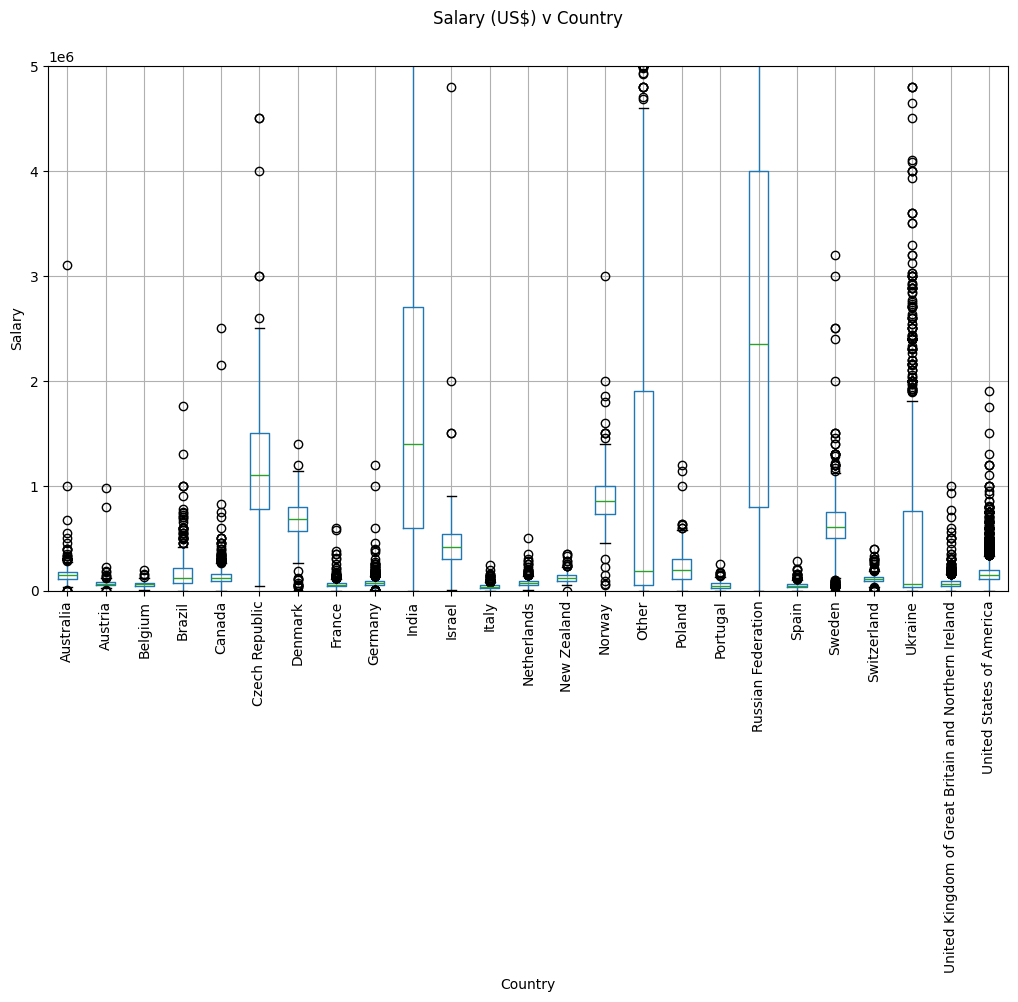

In [12]:

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.ylim(0.0, 5000000)
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df["Salary"] <= 9000000]
df = df[df["Salary"] >= 50000]
df = df[df["Country"] != "Other"]

In [14]:

df["YearsCodePro"] = df["YearsCodePro"].apply(
    lambda x: 50 if x == "More than 50 years" else 0.5 if x == "Less than 1 year" else float(x)
)
df["YearsCodePro"].unique()

array([18. , 25. , 30. , 50. , 27. , 15. , 11. , 23. , 17. ,  1. , 10. ,
        8. , 24. , 12. , 26. , 40. ,  4. , 14. ,  9. , 22. , 44. , 20. ,
       16. , 13. , 19. , 35. ,  5. , 31. ,  7. , 41. , 36. ,  6. ,  3. ,
        2. , 38. , 32. , 28. ,  0.5, 21. , 34. , 29. , 43. , 33. , 45. ,
       37. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [15]:


def clean_education(x):
    if "Bachelor" in x:
        return "Bachelor's degree"
    elif "Master" in x:
        return "Master's degree"
    elif "Professional" in x:
        return "Post grad"
    elif "Something else" or "without" in x:
        return "No degree"

    return "Elementry"


df["EdLevel"] = df["EdLevel"].apply(clean_education)
print(df["EdLevel"].value_counts())

EdLevel
Bachelor's degree    8351
Master's degree      5380
No degree            2976
Post grad            1033
Name: count, dtype: int64


In [16]:

from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].value_counts()

EdLevel
0    8351
1    5380
2    2976
3    1033
Name: count, dtype: int64

In [17]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].value_counts()

Country
23    5765
8     1914
22    1213
9     1184
4      975
21     699
0      588
7      572
19     538
3      524
12     506
15     451
20     375
14     286
18     275
17     271
6      261
1      248
10     238
5      222
13     205
11     184
2      142
16     104
Name: count, dtype: int64

In [18]:

X = df.drop("Salary", axis=1)
y = df["Salary"]

print(X.shape, y.shape)

(17740, 3) (17740,)


In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:

y_pred = reg.predict(X_test)

In [21]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

791235.7994925305


In [22]:

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:

y_pred = reg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

533953.7558287318


In [25]:

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:

y_pred = reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

505930.3938292338


In [28]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

reg = RandomForestRegressor()
gs = GridSearchCV(reg, parameters, scoring="neg_mean_squared_error")
gs.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [29]:

reg = gs.best_estimator_

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

477769.46107805433


In [30]:

X_app = np.array([["India", "Bachelor's degree", 0]])
X_app
X_app[:, 0] = le_country.transform(X_app[:, 0])
X_app[:, 1] = le_education.transform(X_app[:, 1])
X_app = X_app.astype(float)
X_app

array([[9., 0., 0.]])

In [31]:

y_app_pred = reg.predict(X_app)
y_app_pred

/home/harshnj/Documents/PythonProjects/MachineLearning/basics/taxi_analysis/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1030077.93057011])

In [32]:

import pickle

data = {
    "model": reg,
    "le_country": le_country,
    "le_education": le_education,
}

with open("model.pkl", "wb") as file:
    pickle.dump(data, file)